# **Data Analytics Assignment 02**
## **Neural Networks from Scratch using Numpy only**
---

In [18]:
import numpy as np  # import numpy library

from util.utilities import *
from Layers.LinearLayer import LinearLayer
from Layers.ActivationLayer import SigmoidLayer

### **03 - Defining an Architecture**
#### **Model Instance**

In [ ]:
# define training constants
learning_rate = 1
number_of_epochs = 5000

np.random.seed(48) # set seed value so that the results are reproduceable
                  # (weights will now be initailzaed to the same pseudo-random numbers, each time)


# Our network architecture has the shape: 
#                   (input)--> [Linear->Sigmoid] -> [Linear->Sigmoid] -->(output)  

#------ LAYER-1 ----- define hidden layer that takes in training data 
Z1 = LinearLayer(input_shape=X_train.shape, n_out=3, ini_type='xavier')
A1 = SigmoidLayer(Z1.Z.shape)

#------ LAYER-2 ----- define output layer that take is values from hidden layer
Z2= LinearLayer(input_shape=A1.A.shape, n_out=1, ini_type='xavier')
A2= SigmoidLayer(Z2.Z.shape)

#### **Training**

In [ ]:
costs = [] # initially empty list, this will store all the costs after a certian number of epochs

# Start training
for epoch in range(number_of_epochs):
    
    # ------------------------- forward-prop -------------------------
    Z1.forward(X_train)
    A1.forward(Z1.Z)
    
    Z2.forward(A1.A)
    A2.forward(Z2.Z)
    
    # ---------------------- Compute Cost ----------------------------
    cost, dA2 = compute_cost(Y=Y_train, Y_hat=A2.A)
    
    # print and store Costs every 100 iterations.
    if (epoch % 100) == 0:
        #print("Cost at epoch#" + str(epoch) + ": " + str(cost))
        print("Cost at epoch#{}: {}".format(epoch, cost))
        costs.append(cost)
    
    # ------------------------- back-prop ----------------------------
    A2.backward(dA2)
    Z2.backward(A2.dZ)
    
    A1.backward(Z2.dA_prev)
    Z1.backward(A1.dZ)
    
    # ----------------------- Update weights and bias ----------------
    Z2.update_params(learning_rate=learning_rate)
    Z1.update_params(learning_rate=learning_rate)

# **Trying with XOR**

In [7]:
%matplotlib inline 

In [8]:
# This is our XOR gate data 

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [9]:
X_train = X.T
Y_train = Y.T

In [10]:
# define training constants
learning_rate = 1
number_of_epochs = 5000

np.random.seed(48) # set seed value so that the results are reproduceable
                  # (weights will now be initailzaed to the same pseudo-random numbers, each time)


# Our network architecture has the shape: 
#                   (input)--> [Linear->Sigmoid] -> [Linear->Sigmoid] -->(output)  

#------ LAYER-1 ----- define hidden layer that takes in training data 
Z1 = LinearLayer(input_shape=X_train.shape, n_out=3, ini_type='xavier')
A1 = SigmoidLayer(Z1.Z.shape)

#------ LAYER-2 ----- define output layer that take is values from hidden layer
Z2= LinearLayer(input_shape=A1.A.shape, n_out=1, ini_type='xavier')
A2= SigmoidLayer(Z2.Z.shape)

# see what random weights and bias were selected and their shape 
# print(Z2.params)
# print(Z2.params)

In [11]:
costs = [] # initially empty list, this will store all the costs after a certian number of epochs

# Start training
for epoch in range(number_of_epochs):
    
    # ------------------------- forward-prop -------------------------
    Z1.forward(X_train)
    A1.forward(Z1.Z)
    
    Z2.forward(A1.A)
    A2.forward(Z2.Z)
    
    # ---------------------- Compute Cost ----------------------------
    cost, dA2 = compute_cost(Y=Y_train, Y_hat=A2.A)
    
    # print and store Costs every 100 iterations.
    if (epoch % 100) == 0:
        print("Cost at epoch#{}: {}".format(epoch, cost))
        costs.append(cost)
    
    # ------------------------- back-prop ----------------------------
    A2.backward(dA2)
    Z2.backward(A2.dZ)
    
    A1.backward(Z2.dA_prev)
    Z1.backward(A1.dZ)
    
    # ----------------------- Update weights and bias ----------------
    Z2.update_params(learning_rate=learning_rate)
    Z1.update_params(learning_rate=learning_rate)

# See what the final weights and bias are training    
# print(Z2.params)
# print(Z2.params)

Cost at epoch#0: 0.12926510193084198
Cost at epoch#100: 0.12345825692804888
Cost at epoch#200: 0.12066966113381938
Cost at epoch#300: 0.1166803602125806
Cost at epoch#400: 0.11130833351272905
Cost at epoch#500: 0.10488049601356227
Cost at epoch#600: 0.09838889588798089
Cost at epoch#700: 0.09243739122926581
Cost at epoch#800: 0.08674109898244503
Cost at epoch#900: 0.0803633800361436
Cost at epoch#1000: 0.0718884940923021
Cost at epoch#1100: 0.06026682287648237
Cost at epoch#1200: 0.0466727790621477
Cost at epoch#1300: 0.034031803169728723
Cost at epoch#1400: 0.024420892209798026
Cost at epoch#1500: 0.01788335037948313
Cost at epoch#1600: 0.013556791347344173
Cost at epoch#1700: 0.010645079603116687
Cost at epoch#1800: 0.008621081313392114
Cost at epoch#1900: 0.0071644476390068206
Cost at epoch#2000: 0.0060818281219791
Cost at epoch#2100: 0.00525404233810935
Cost at epoch#2200: 0.00460539786880718
Cost at epoch#2300: 0.004086292752964944
Cost at epoch#2400: 0.0036632376282681603
Cost at

In [13]:
def predict(X, Y, Zs, As):
    """
    helper function to predict on data using a neural net model layers

    Args:
        X: Data in shape (features x num_of_examples)
        Y: labels in shape ( label x num_of_examples)
        Zs: All linear layers in form of a list e.g [Z1,Z2,...,Zn]
        As: All Activation layers in form of a list e.g [A1,A2,...,An]
    Returns::
        p: predicted labels
        probas : raw probabilities
        accuracy: the number of correct predictions from total predictions
    """
    m = X.shape[1]
    n = len(Zs)  # number of layers in the neural network
    p = np.zeros((1, m))

    # Forward propagation
    Zs[0].forward(X)
    As[0].forward(Zs[0].Z)
    for i in range(1, n):
        Zs[i].forward(As[i-1].A)
        As[i].forward(Zs[i].Z)
    probas = As[n-1].A

    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0, i] > 0.5:  # 0.5 is threshold
            p[0, i] = 1
        else:
            p[0, i] = 0

    # print results
    # print ("predictions: " + str(p))
    # print ("true labels: " + str(y))
    accuracy = np.sum((p == Y) / m)

    return p, probas, accuracy*100

In [14]:
# see the ouptput predictions
predicted_outputs, _, accuracy = predict(X=X_train, Y=Y_train, Zs=[Z1, Z2], As=[A1, A2])

print("The predicted outputs:\n {}".format(predicted_outputs))
print("The accuracy of the model is: {}%".format(accuracy))

The predicted outputs:
 [[0. 1. 1. 0.]]
The accuracy of the model is: 100.0%


In [16]:
import matplotlib.pyplot as plt
def plot_learning_curve(costs, learning_rate, total_epochs, save=False):
    """
    This function plots the Learning Curve of the model

    Args:
        costs: list of costs recorded during training
        learning_rate: the learning rate during training
        total_epochs: number of epochs the model was trained for
        save: bool flag to save the image or not. Default False
    """
    # plot the cost
    plt.figure()

    steps = int(total_epochs / len(costs))  # the steps at with costs were recorded
    plt.ylabel('Cost')
    plt.xlabel('Iterations ')
    plt.title("Learning rate =" + str(learning_rate))
    plt.plot(np.squeeze(costs))
    locs, labels = plt.xticks()
    plt.xticks(locs[1:-1], tuple(np.array(locs[1:-1], dtype='int')*steps))  # change x labels of the plot
    plt.xticks()
    if save:
        plt.savefig('Cost_Curve.png', bbox_inches='tight')
    plt.show()

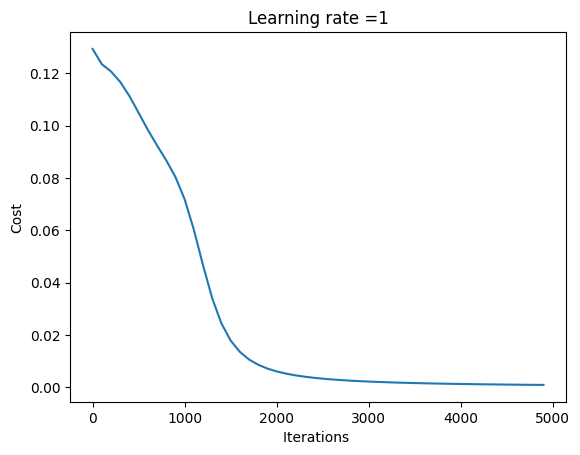

In [17]:
plot_learning_curve(costs=costs, learning_rate=learning_rate, total_epochs=number_of_epochs)